### Clustering With K Means for Employess Based on thier Age and Income

#### Problem Statment: We want to put every employee in suitable cluster based on his features

#### Data: This dataset contains information about employees features like name,age and Income, and we got it from kaggle https://www.kaggle.com/datasets/siddharthaborgohain/kmeans-clustering-of-income-dataset

##### Dataset contains following attributes:
* Name - Employee Name 
* Age - numeric variable
* Income - numeric variable


##### Machine Learing algorithm: We will use KMeans

#### Project Steps:
* Load packages that we will use 
* Load and Inspect Data
* Make EDA to discover more about data
* Data Preprocessing to prepare data for modeling
* Build our model using KMeans
* Plot Our clusters to check the accuracy of model

### Load Packages

In [2]:
# Import Our Necessary Libraries for data manipulation, analysis, modeling and evaluation
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

### Load & Inspect Data

In [69]:
df = pd.read_csv("income.csv")

In [4]:
# Read first 5 rows
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


### EDA

In [12]:
# see statsical info
df.describe().round(3)

,Age,Income($)
count,22.000,22.000
mean,34.818,90431.818
std,5.901,43505.964
min,26.000,45000.000
25%,29.000,58500.000
50%,36.500,67500.000
75%,39.750,135250.000
max,43.000,162000.000


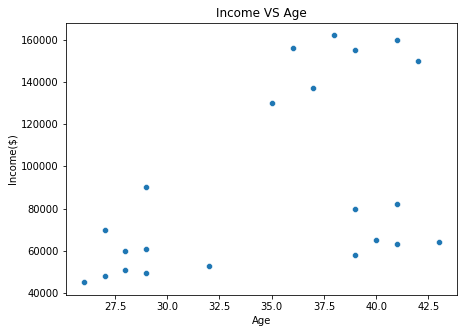

In [13]:
# scatterplot graph between Income and Age
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Age',y = 'Income($)', data = df)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Income VS Age')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

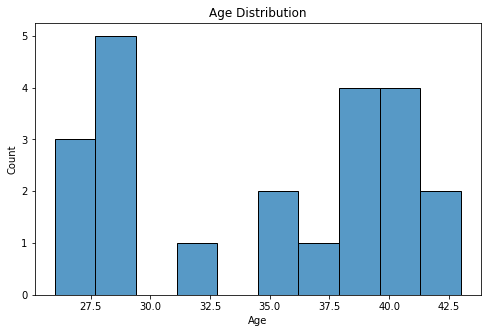

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Age',bins=10)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

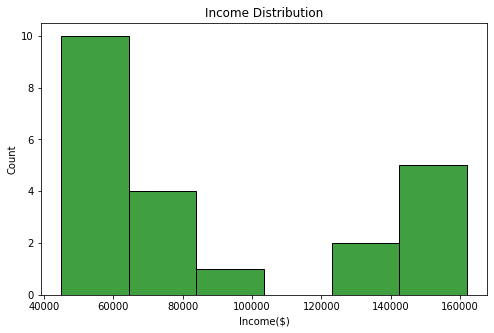

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Income($)',color='g')
plt.title('Income Distribution')

In [30]:
# top five persons have avg Income
df.groupby('Name')['Income($)','Age'].mean().sort_values(by='Income($)').head()

,Income($),Age
Name,,
Tom,45000.0,26.0
Arnold,48000.0,27.0
Stark,49500.0,29.0
Jared,51000.0,28.0
Ranbir,53000.0,32.0


In [70]:
df_corr = df.corr().round(2)
df_corr

,Age,Income($)
Age,1.0,0.5
Income($),0.5,1.0


<AxesSubplot: >

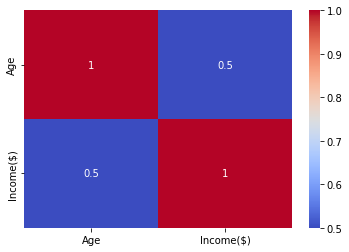

In [74]:
# plot it
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

### Modeling  

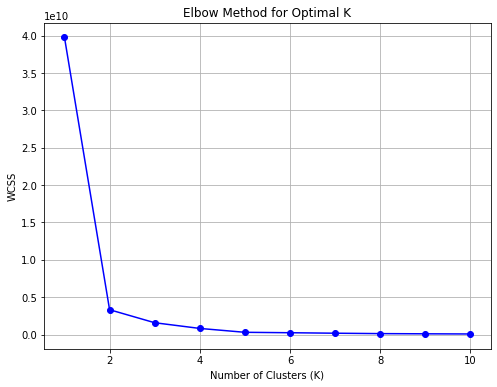

In [6]:
# elbow method to chose #clusters
wcss = []
            
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop('Name',axis=1))
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for  #K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [35]:
# Data Preprocessing
# Rescale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [57]:
# Build the model
km_model = KMeans(n_clusters=3)
pred = km_model.fit_predict(df[['Age','Income($)']])

In [58]:
# create cluster column
df['cluster'] = pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [59]:
df['cluster'].nunique()

3

In [60]:
km_model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [61]:
km_model.cluster_centers_[:,0]

array([0.85294118, 0.1372549 , 0.72268908])

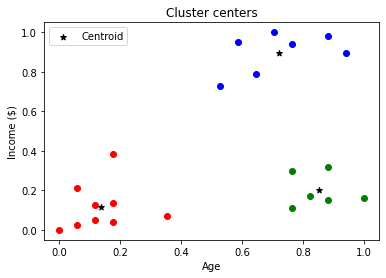

In [62]:
# check model accuracy
# try to plot the 3 clusters
# plt.figure(figsize=(8,6))
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Cluster centers')
plt.legend()
plt.show()


# 